## COLLECTING THE DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import RobustScaler

In [3]:
wineDf = pd.read_csv("data/wineReviews.csv", usecols=['Reviews Rating', 'Reviews Text'])
pd.set_option('display.max_colwidth', None)
wineDf.columns = ['Rating', 'Review']
wineDf.sample(10)

,Rating,Review
411,5.0,Great product!
1523,4.0,"I have been using Fiber Choice tabs for several years and feel they help keep bowel movements normal. They are a little pricey at 11cents per tablet, but are much easier to take than mixing powders with water - so convenience is worth something."
2853,4.0,"I've only tried the chardonnay, so my review is for that wine. I find it very good when chilled properly. I take it out of the refrigerator an hour before drinking it & it's perfect. It's not to cold or warm. When drunk too cold, it doesn't have much taste. At the proper temp, it becomes much more complex. It has a clean delicate taste of peach & apricot. It's not a heavy chardonnay. No oak, butter or vanilla undertone. I prefer this crisper, fresher chardonnay. The heavy ones make me gag."
2383,5.0,I bought Carmex several years ago when I had a big bad break out of cold sores that spread all over my lips. With in 2 to 3 weeks of using Carmex my lips and the cold sores were pretty much gone and the cold sores have pretty much have never come back. I have also gotten my brother to use Carmex to.
2367,5.0,I have been using Carmex for chapped lips since my lips were always chapped when I was a kid. My Dad gave it to me and said this works great and Dad's know everything. That was 64 years ago and I still use it today.
1530,4.0,"It is fine, but it lacked the weight control feature that I was hoping for. My fault, I guess, but it's fine otherwise."
1359,5.0,Lucky
1050,4.0,Nice machine . It's slower than a gas machine but it gets the job done.
1043,5.0,"I purchased an electric model just to avoid another gas engine. This model works good cleaning our patio aggregate steps, walk driveway. It's light weight, easy to store priced accordingly."
1975,5.0,I buy this every fall time. I get very dry chapped lips in fall and winter this works very well for that. It clears it right up.


In [4]:
wineDf.describe(), wineDf.shape, wineDf.isnull().sum()
#We can see that the wine ratings range from 1 to 5 and that most wine ratings (at least 75%) has a rating of 5

(            Rating
 count  2445.000000
 mean      4.690798
 std       0.843344
 min       1.000000
 25%       5.000000
 50%       5.000000
 75%       5.000000
 max       5.000000,
 (2890, 2),
 Rating    445
 Review      1
 dtype: int64)

In [5]:
wineDf = wineDf.dropna(subset=['Review'])[['Review','Rating']]
wineDf = wineDf.dropna(subset=['Rating'])[['Review','Rating']]
wineDf.shape, wineDf.isnull().sum()
#Removing the rows with empty values

((2444, 2),
 Review    0
 Rating    0
 dtype: int64)

In [415]:
wineDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2444 entries, 0 to 2889
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  2444 non-null   object 
 1   Rating  2444 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.3+ KB


In [6]:
#almost 84% of our data has a rating of 5 > It is very important to divide the ratings equally between the train, dev and test data
wineDf.Rating.value_counts(normalize=True)

5.0    0.837152
4.0    0.090426
1.0    0.028232
3.0    0.026596
2.0    0.017594
Name: Rating, dtype: float64

In [234]:
vect = CountVectorizer()
vect.fit(X)
data = vect.transform(X)
data.max(), data

(19,
 <2444x5120 sparse matrix of type '<class 'numpy.int64'>'
 	with 58825 stored elements in Compressed Sparse Row format>)

## Split Train and Test

In [313]:
y = wineDf.Rating
X = wineDf.Review
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, stratify=y, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2199,), (245,), (2199,), (245,))

In [314]:
y_train.value_counts()

5.0    1841
4.0     199
1.0      62
3.0      58
2.0      39
Name: Rating, dtype: int64

## Majority baseline

In [315]:
#Because there are so many 5 ratings, what would Majority Baseline be?
dummyClass = DummyClassifier(strategy="most_frequent")
dummyClass.fit(X_train, y_train)
baseline = dummyClass.score(X_train, y_train)
baseline

0.8371987266939518

## Training data

### 1. SGDClassifier with CountVectorizer

In [321]:
#Countvectorizer in Gridsearch
vect1 = CountVectorizer()
scaler= RobustScaler(with_centering=False)
clf = SGDClassifier(random_state=7)
pipe = make_pipeline(vect1, scaler, clf)
clf.get_params(), vect1.get_params()

({'alpha': 0.0001,
  'average': False,
  'class_weight': None,
  'early_stopping': False,
  'epsilon': 0.1,
  'eta0': 0.0,
  'fit_intercept': True,
  'l1_ratio': 0.15,
  'learning_rate': 'optimal',
  'loss': 'hinge',
  'max_iter': 1000,
  'n_iter_no_change': 5,
  'n_jobs': None,
  'penalty': 'l2',
  'power_t': 0.5,
  'random_state': 7,
  'shuffle': True,
  'tol': 0.001,
  'validation_fraction': 0.1,
  'verbose': 0,
  'warm_start': False},
 {'analyzer': 'word',
  'binary': False,
  'decode_error': 'strict',
  'dtype': numpy.int64,
  'encoding': 'utf-8',
  'input': 'content',
  'lowercase': True,
  'max_df': 1.0,
  'max_features': None,
  'min_df': 1,
  'ngram_range': (1, 1),
  'preprocessor': None,
  'stop_words': None,
  'strip_accents': None,
  'token_pattern': '(?u)\\b\\w\\w+\\b',
  'tokenizer': None,
  'vocabulary': None})

In [322]:
#Gridsearch with hyperparameters 
#1. countvectorizer binary (does it actually matter how many times these words are used?), 
#2. countvectorizer min_df (do the words that are only used in 1 review in all the training data help our training model?),
#3. penalty: regularization, how well should the model be fitted to the training data 
#4. loss: which model has the best loss_function for our training data
params = [{
    'countvectorizer__binary': [True, False],
    'countvectorizer__min_df': [1, 2],
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__loss': ['hinge', 'log', 'perceptron'],
    }]
gs = GridSearchCV(pipe, params, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
#Fitting the data (cross validation of 10)
gs.fit(X_train, y_train)
gs.best_estimator_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('robustscaler', RobustScaler(with_centering=False)),
                ('sgdclassifier', SGDClassifier(loss='log', random_state=7))])

In [324]:
#Which hyperparameters create the optimal training model
results1 = pd.DataFrame(gs.cv_results_)
results1[['param_countvectorizer__binary', 'param_countvectorizer__min_df', 'param_sgdclassifier__penalty', 'param_sgdclassifier__loss', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,param_countvectorizer__binary,param_countvectorizer__min_df,param_sgdclassifier__penalty,param_sgdclassifier__loss,mean_test_score
21,False,1,l2,log,0.374524
33,False,2,l2,perceptron,0.370866
16,True,2,l1,perceptron,0.358387
20,False,1,elasticnet,hinge,0.357454
7,True,1,l1,perceptron,0.357176


In [323]:
gs.best_score_, gs.best_params_

(0.3745236317466558,
 {'countvectorizer__binary': False,
  'countvectorizer__min_df': 1,
  'sgdclassifier__loss': 'log',
  'sgdclassifier__penalty': 'l2'})

In [325]:
y_test_pred1 = gs.predict(X_test)
print(classification_report(y_test, y_test_pred1))
#Precision interpretation: of all the times the model guessed 1, 64% was correct
#Recall interpretation: of all 14 cases that the rating should be 1, the training model guessed 50% correctly
#> Highest precision and recall is expected with rating of 5 because this class has the most data in the training model
#precision and recall should be improved in other classes

              precision    recall  f1-score   support

         1.0       0.33      0.14      0.20         7
         2.0       0.00      0.00      0.00         4
         3.0       0.50      0.29      0.36         7
         4.0       0.17      0.09      0.12        22
         5.0       0.86      0.95      0.90       205

    accuracy                           0.81       245
   macro avg       0.37      0.29      0.32       245
weighted avg       0.76      0.81      0.78       245



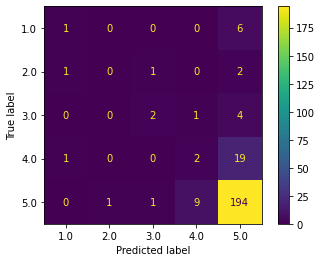

In [326]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred1);

### 2. SGDClassifier with Tfidfvectorizer

In [327]:
#Doing the same with Tdidfvectorizer (checking if model is better if words that occur in multiple reviews have less importance)
vect2 = TfidfVectorizer()
scaler2 = RobustScaler(with_centering=False)
clf = SGDClassifier(random_state=7)
pipe2 = make_pipeline(vect2, scaler2, clf)
params = [{
    'tfidfvectorizer__binary': [True, False],
    'tfidfvectorizer__min_df': [1, 2],
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__loss': ['hinge', 'log', 'perceptron']
    }]
gs2 = GridSearchCV(pipe2, params, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
gs2.fit(X_train, y_train)
gs2.best_estimator_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(binary=True)),
                ('robustscaler', RobustScaler(with_centering=False)),
                ('sgdclassifier',
                 SGDClassifier(loss='perceptron', penalty='l1',
                               random_state=7))])

In [329]:
#Which hyperparameters create the optimal training model
results2 = pd.DataFrame(gs2.cv_results_)
results2[['param_tfidfvectorizer__binary', 'param_tfidfvectorizer__min_df', 'param_sgdclassifier__penalty', 'param_sgdclassifier__loss', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,param_tfidfvectorizer__binary,param_tfidfvectorizer__min_df,param_sgdclassifier__penalty,param_sgdclassifier__loss,mean_test_score
28,True,1,l1,perceptron,0.377122
30,False,1,l1,perceptron,0.374852
6,False,1,l1,hinge,0.365332
27,False,2,l2,perceptron,0.360913
5,True,2,l1,hinge,0.360383


In [330]:
gs2.best_score_, gs2.best_params_
#Model shows lower score than with Countvectorizer

(0.37712241171768224,
 {'sgdclassifier__loss': 'perceptron',
  'sgdclassifier__penalty': 'l1',
  'tfidfvectorizer__binary': True,
  'tfidfvectorizer__min_df': 1})

In [152]:
y_test_pred2 = gs2.predict(X_test)
print(classification_report(y_test, y_test_pred2))
#Lower precision and recall overall (except with class 2)

              precision    recall  f1-score   support

         1.0       0.50      0.29      0.36         7
         2.0       0.00      0.00      0.00         4
         3.0       0.25      0.14      0.18         7
         4.0       0.13      0.09      0.11        22
         5.0       0.87      0.94      0.90       205

    accuracy                           0.80       245
   macro avg       0.35      0.29      0.31       245
weighted avg       0.76      0.80      0.78       245



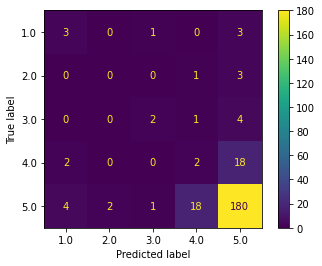

In [148]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred2);

The countvectorizer has the highest f1 macro score and in most cases the highest precision and recall (except for class 2)
Surprisingly, the gridsearch tells us that the logisticclassifier creates the optimal loss function using the Countvectorizer. 
I want to check if there are other solvers/C-values with the logisticclassifier where the loss function can be optimized.

### 3. LogisticClassifier using Countvectorizer

In [159]:
#Create pipeline with new vector, scaler, logisticClassifier
vect3 = CountVectorizer(min_df)
scaler3 = RobustScaler(with_centering=False)
logreg = LogisticRegression(random_state=7)
pipe3 = make_pipeline(vect3, scaler3, logreg)

In [160]:
params = [{
    'countvectorizer__binary': [True, False],
    'countvectorizer__min_df': [1, 2],
    'logisticregression__C': [1.0, 10, 100, 1000, 1100],
    'logisticregression__solver': ['lbfgs', 'liblinear'],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet']
    }]
gs3 = GridSearchCV(pipe3, params, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
#Fitting the data (cross validation of 10)
gs3.fit(X_train, y_train)
gs3.best_estimator_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


C:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\franc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalt

Pipeline(steps=[('countvectorizer', CountVectorizer(min_df=2)),
                ('robustscaler', RobustScaler(with_centering=False)),
                ('logisticregression',
                 LogisticRegression(C=10, random_state=7, solver='liblinear'))])

In [161]:
#some solvers are incompatable with different penalties, which is why this gives some warnings

In [163]:
gs3.best_score_, gs3.best_params_

(0.3638857121346935,
 {'countvectorizer__min_df': 2,
  'logisticregression__C': 10,
  'logisticregression__penalty': 'l2',
  'logisticregression__solver': 'liblinear'})

In [166]:
results3 = pd.DataFrame(gs3.cv_results_)
results3[['param_countvectorizer__min_df','param_logisticregression__C', 'param_logisticregression__penalty', 'param_logisticregression__solver', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,param_countvectorizer__min_df,param_logisticregression__C,param_logisticregression__penalty,param_logisticregression__solver,mean_test_score
39,2,10,l2,liblinear,0.363886
56,2,1100,l2,lbfgs,0.360067
50,2,1000,l2,lbfgs,0.357368
9,1,10,l2,liblinear,0.355394
38,2,10,l2,lbfgs,0.351963


In [167]:
y_pred3 = gs3.predict(X_test)
print(f'LogisticClassifier: \n{classification_report(y_test, y_pred3)}')
# print(f'GDSClassifier: \n{classification_report(y_test, y_test_pred)}')
#However on looking at testData, GDSClassifier performs better

LogisticClassifier: 
              precision    recall  f1-score   support

         1.0       1.00      0.14      0.25         7
         2.0       0.00      0.00      0.00         4
         3.0       0.67      0.29      0.40         7
         4.0       0.08      0.05      0.06        22
         5.0       0.86      0.96      0.91       205

    accuracy                           0.82       245
   macro avg       0.52      0.29      0.32       245
weighted avg       0.78      0.82      0.78       245



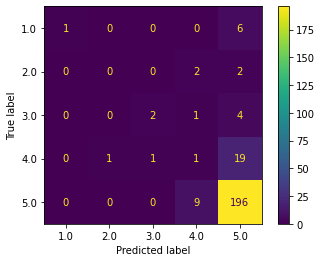

In [181]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3);

In [437]:
d = {'true': y_test, 'pred': y_test_pred, 'review': X_test}
output = pd.DataFrame(data=d)
output[(output['true'] == 2.0) & (output['pred'] != 5.0)]

,true,pred,review
512,2.0,3.0,this product as well as many others would be more appealing to me and others if the HFCS was replaced with cane sugar. You have a good product and there are ways to make it better. An increase in price would not deter me in the least. Look at the growth of the organic industry. Need I say more
1417,2.0,1.0,Not as good as pilsbury. The cressants did not come off easily. They stuck together


In [438]:
coefs = gs.best_estimator_.named_steps.logisticregression.coef_

# Logistic regression with Tfidf Vectorizer

In [190]:
#Create pipeline with new vector, scaler, logisticClassifier
vect4 = TfidfVectorizer(min_df=2)
scaler4 = RobustScaler(with_centering=False)
logreg2 = LogisticRegression(random_state=7)
pipe4 = make_pipeline(vect4, scaler4, logreg2)

In [192]:
params = [{
#     'tfidfvectorizer__binary': [True, False],
    'tfidfvectorizer__min_df': [1, 2],
    'logisticregression__C': [10, 100, 1000, 1100],
    'logisticregression__solver': ['lbfgs', 'liblinear'],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet']
    }]
gs4 = GridSearchCV(pipe4, params, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
#Fitting the data (cross validation of 10)
gs4.fit(X_train, y_train)
gs4.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


C:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\franc\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\franc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalt

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('robustscaler', RobustScaler(with_centering=False)),
                ('logisticregression',
                 LogisticRegression(C=1100, penalty='l1', random_state=7,
                                    solver='liblinear'))])

In [193]:
gs4.best_score_, gs4.best_params_

(0.3719506203339823,
 {'logisticregression__C': 1100,
  'logisticregression__penalty': 'l1',
  'logisticregression__solver': 'liblinear',
  'tfidfvectorizer__binary': False,
  'tfidfvectorizer__min_df': 1})

In [195]:
results4 = pd.DataFrame(gs4.cv_results_)
#'param_tfidfvectorizer__binary',
results4[['param_tfidfvectorizer__min_df','param_logisticregression__C', 'param_logisticregression__penalty', 'param_logisticregression__solver', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,param_tfidfvectorizer__min_df,param_logisticregression__C,param_logisticregression__penalty,param_logisticregression__solver,mean_test_score
78,1,1100,l1,liblinear,0.371951
35,2,100,l2,lbfgs,0.370169
79,2,1100,l1,liblinear,0.366585
54,1,1000,l1,liblinear,0.365818
59,2,1000,l2,lbfgs,0.361277


In [196]:
y_pred4 = gs4.predict(X_test)
print(f'LogisticClassifier with Tfidf classifier: \n{classification_report(y_test, y_pred4)}')

LogisticClassifier: 
              precision    recall  f1-score   support

         1.0       0.20      0.14      0.17         7
         2.0       0.00      0.00      0.00         4
         3.0       1.00      0.29      0.44         7
         4.0       0.17      0.14      0.15        22
         5.0       0.88      0.94      0.91       205

    accuracy                           0.81       245
   macro avg       0.45      0.30      0.33       245
weighted avg       0.78      0.81      0.79       245



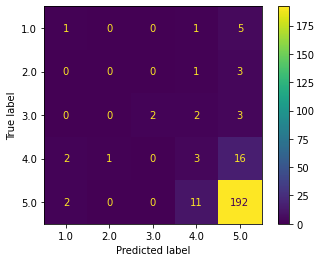

In [197]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred4);

# KNN imputer

In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
vectKnn = TfidfVectorizer()
knn.get_params()
param_grid = [{
    'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]
    }]

pipeknn = make_pipeline(vectKnn, scaler, knn)
gsknn = GridSearchCV(pipeknn, param_grid, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1)
gsknn.fit(X_train, y_train)
gsknn.best_estimator_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('maxabsscaler', MaxAbsScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [208]:
gsknn.best_score_, gsknn.best_params_

(0.27167802911575767, {'kneighborsclassifier__n_neighbors': 2})

In [209]:
results = pd.DataFrame(gsknn.cv_results_)
results.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.225986,0.034717,0.087953,0.009578,2,{'kneighborsclassifier__n_neighbors': 2},0.175211,0.341057,0.212654,0.176327,0.408491,0.388302,0.247688,0.220726,0.309879,0.236446,0.271678,0.080552,1
0,0.207150,0.024079,0.091729,0.011846,1,{'kneighborsclassifier__n_neighbors': 1},0.186996,0.320155,0.204559,0.203318,0.362981,0.365306,0.249890,0.234973,0.320958,0.255703,0.270484,0.063477,2
2,0.208765,0.014305,0.090780,0.010169,3,{'kneighborsclassifier__n_neighbors': 3},0.193843,0.348191,0.224597,0.190931,0.259899,0.307551,0.269822,0.274560,0.295544,0.197306,0.256224,0.050793,3
3,0.213645,0.021926,0.104768,0.014971,4,{'kneighborsclassifier__n_neighbors': 4},0.209635,0.209164,0.221189,0.236089,0.180549,0.288825,0.232687,0.241531,0.239689,0.197872,0.225723,0.028200,4
7,0.212022,0.028888,0.087214,0.016590,8,{'kneighborsclassifier__n_neighbors': 8},0.181095,0.180000,0.214787,0.179449,0.201678,0.181546,0.201678,0.247459,0.241627,0.199391,0.202871,0.023765,5


# Support Vector Classification

In [227]:
from sklearn.svm import LinearSVC, SVC
svm1 = SVC()
vectsvm1 = TfidfVectorizer(min_df=2)
pipesvm1 = make_pipeline(vectsvm1, scaler, svm1)
svm1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [230]:
params = [{
#     'tfidfvectorizer__binary': [True, False],
#     'tfidfvectorizer__min_df': [1, 2],
    'svc__C': [10, 100, 1000, 1100],
    'svc__kernel': ['rbf', 'poly', 'linear'],
    }]
gs5 = GridSearchCV(pipesvm1, params, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
#Fitting the data (cross validation of 10)
gs5.fit(X_train, y_train)
gs5.best_estimator_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(min_df=2)),
                ('robustscaler', RobustScaler(with_centering=False)),
                ('svc', SVC(C=10, kernel='linear'))])

In [231]:
gs5.best_score_, gs5.best_params_

(0.3612449764736064, {'svc__C': 10, 'svc__kernel': 'linear'})

In [232]:
results5 = pd.DataFrame(gs5.cv_results_)
results5[['param_svc__C', 'param_svc__kernel', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,param_svc__C,param_svc__kernel,mean_test_score
2,10,linear,0.361245
5,100,linear,0.359929
8,1000,linear,0.359929
11,1100,linear,0.359929
10,1100,poly,0.297209


In [241]:
y_pred5 = gs5.predict(X_test)
print(f'SVC: \n{classification_report(y_test, y_pred5)}')

SVC: 
              precision    recall  f1-score   support

         1.0       0.50      0.14      0.22         7
         2.0       0.00      0.00      0.00         4
         3.0       0.67      0.29      0.40         7
         4.0       0.08      0.05      0.06        22
         5.0       0.86      0.94      0.90       205

    accuracy                           0.80       245
   macro avg       0.42      0.28      0.32       245
weighted avg       0.76      0.80      0.77       245



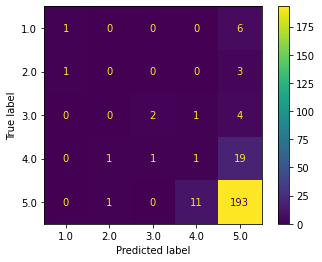

In [242]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred5);

# Linear Suport Vector Classification

In [243]:
svm2 = LinearSVC(max_iter=10000)
vectsvm2 = TfidfVectorizer(min_df=2)
pipesvm2 = make_pipeline(vectsvm2, scaler, svm2)
svm2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 10000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [244]:
params = [{
    'linearsvc__C': [10, 100, 1000, 1100],
    'linearsvc__loss': ['squared_hinge', 'hinge'],
    }]

gs6 = GridSearchCV(pipesvm2, params, cv=10, scoring='f1_macro', n_jobs=-1, verbose=1, refit=True)
#Fitting the data (cross validation of 10)
gs6.fit(X_train, y_train)
gs6.best_estimator_

Fitting 10 folds for each of 8 candidates, totalling 80 fits


C:\Users\franc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(min_df=2)),
                ('robustscaler', RobustScaler(with_centering=False)),
                ('linearsvc', LinearSVC(C=10, loss='hinge', max_iter=10000))])

In [ ]:
#penalty l1 and loss hinge are incompatible

In [253]:
gs6.best_score_, gs6.best_params_

(0.36090445487235945, {'linearsvc__C': 10, 'linearsvc__loss': 'hinge'})

In [254]:
results6 = pd.DataFrame(gs6.cv_results_)
results6[['param_linearsvc__C', 'param_linearsvc__loss', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head()

,param_linearsvc__C,param_linearsvc__loss,mean_test_score
1,10,hinge,0.360904
0,10,squared_hinge,0.354837
2,100,squared_hinge,0.343629
3,100,hinge,0.337191
6,1100,squared_hinge,0.329395


In [255]:
y_pred6 = gs6.predict(X_test)
print(f'SVCLinear: \n{classification_report(y_test, y_pred6)}')

SVCLinear: 
              precision    recall  f1-score   support

         1.0       0.67      0.29      0.40         7
         2.0       0.00      0.00      0.00         4
         3.0       0.40      0.29      0.33         7
         4.0       0.08      0.05      0.06        22
         5.0       0.86      0.93      0.89       205

    accuracy                           0.80       245
   macro avg       0.40      0.31      0.34       245
weighted avg       0.76      0.80      0.77       245



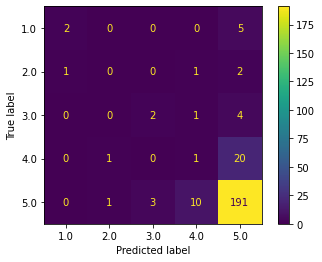

In [249]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred6);

# Comparing all models

In [309]:
results6.sort_values('mean_test_score', ascending=False).iloc[1, 7:17]

split0_test_score    0.261684
split1_test_score    0.358417
split2_test_score    0.351185
split3_test_score     0.38885
split4_test_score    0.491874
split5_test_score    0.310916
split6_test_score    0.200788
split7_test_score    0.470835
split8_test_score    0.386175
split9_test_score     0.32765
Name: 0, dtype: object

<AxesSubplot:>

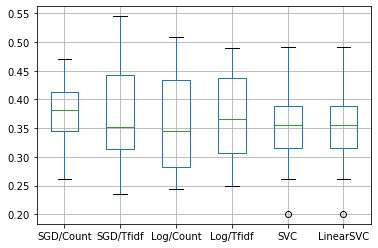

In [331]:
d = {} 
d["SGD/Count"] = np.array(results1.sort_values('mean_test_score', ascending=False).iloc[1, 9:19]).astype(float)
d["SGD/Tfidf"] = np.array(results2.sort_values('mean_test_score', ascending=False).iloc[1, 9:19]).astype(float)
d["Log/Count"] = np.array(results3.sort_values('mean_test_score', ascending=False).iloc[1, 9:19]).astype(float)
d["Log/Tfidf"] = np.array(results4.sort_values('mean_test_score', ascending=False).iloc[1, 10:20]).astype(float)
d["SVC"]= np.array(results5.sort_values('mean_test_score', ascending=False).iloc[1, 7:17]).astype(float)
d["LinearSVC"]= np.array(results5.sort_values('mean_test_score', ascending=False).iloc[1, 7:17]).astype(float)
allres = pd.DataFrame(d)
allres.boxplot()

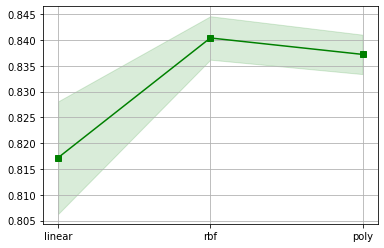

In [455]:
from sklearn.model_selection import validation_curve
param_range = ['linear', 'rbf', 'poly']
train_scores, test_scores = validation_curve(estimator=pipesvm, X=X_train, y=y_train, \
                                             param_name= 'svc__kernel', param_range=param_range, cv=10)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, test_mean, color='green', marker='s')
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')
plt.grid()
plt.show()

In [ ]:
d = {'lr': lr_scores, 'dt': dt_scores, 'knn': knn_scores, 'svm1': svm1_scores, 'svm2': svm2_scores}
results = pd.DataFrame(d)
results.boxplot();